In [ ]:
!apt-get install python3-h5py python3-numpy
!pip3 install protobuf==3.19.6
!wget https://developer.download.nvidia.com/compute/redist/jp/v461/tensorflow/tensorflow-2.7.0+nv22.1-cp36-cp36m-linux_aarch64.whl
!pip3 install tensorflow-2.7.0+nv22.1-cp36-cp36m-linux_aarch64.whl
!pip3 install numpy matplotlib

(60000, 28, 28)
(10000, 28, 28)


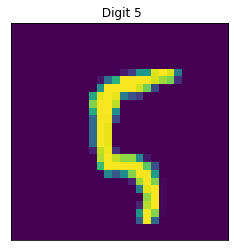

min and max value in image:  0 255


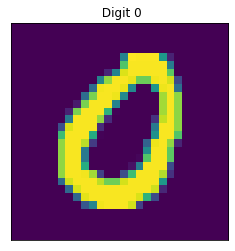

min and max value in image:  0.0 1.0
(28, 28, 1)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


img_rows, img_cols = 28, 28  

num_classes = 10 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data() 


print(train_images.shape) 
print(test_images.shape) 

if K.image_data_format() == 'channels_first': 
  train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
  test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
  test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

plot_image(train_images, 4563, train_labels)
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print(train_images[1232].shape)